# **Imports and Load Dependences**


In [38]:
!pip install unidecode

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

# Function to remove special characters
from unidecode import unidecode

from tqdm.notebook import tqdm, trange

# Feature Eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

my_palette = sns.diverging_palette(230, 20, as_cmap=False)
sns.set_theme(style="ticks", palette=my_palette)

# **Load Datasets**

In [40]:
#@title Download Datasets from GDrive

# ESC FREQ 1
!gdown 1IpQuBoxR79tHk8IIAZzwFWtUjzSLr6uZ

# Economic Level
!gdown 1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ

Downloading...
From: https://drive.google.com/uc?id=1IpQuBoxR79tHk8IIAZzwFWtUjzSLr6uZ
To: /content/RAIS_ESC_FREQ.csv
100% 315k/315k [00:00<00:00, 73.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ
To: /content/results_scrapper_PCDII.csv
100% 698k/698k [00:00<00:00, 31.9MB/s]


In [41]:
df = pd.read_csv('RAIS_ESC_FREQ.csv', encoding='ISO-8859-1', sep=';')
df.columns = [key.replace(' ','_').capitalize() for key in df.columns]

nve_df = pd.read_csv('results_scrapper_PCDII.csv', index_col=0)
nve_df.columns = [key.replace(' ','_').capitalize() for key in nve_df.columns]

# **Pre-Processing**

## **ESC FREQ**

In [42]:
#@title Show attributes types and evaluate the existence of NaN values in each feature
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Município               5570 non-null   object
 1   Analfabeto              5570 non-null   int64 
 2   Até_5_incompleto        5570 non-null   int64 
 3   5_completo_fundamental  5570 non-null   int64 
 4   6_a_9_fundamental       5570 non-null   int64 
 5   Fundamental_completo    5570 non-null   int64 
 6   Médio_incompleto        5570 non-null   int64 
 7   Médio_completo          5570 non-null   int64 
 8   Superior_incompleto     5570 non-null   int64 
 9   Superior_completo       5570 non-null   int64 
 10  Mestrado                5570 non-null   int64 
 11  Doutorado               5570 non-null   int64 
 12  Total                   5570 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 565.8+ KB


In [43]:
#@title Describe dataset with summary measures
#@markdown The idea is to evaluate the existence of different scales beetwen the features
#@markdown - Presence of outliers or influence of larger cities?
df.describe()

Analfabeto  Até_5_incompleto  5_completo_fundamental  \
count   5570.000000       5570.000000             5570.000000   
mean      33.735368        186.564632              159.642011   
std      204.527925       1120.172770             1040.744498   
min        0.000000          0.000000                0.000000   
25%        2.000000         16.000000               14.000000   
50%        6.000000         43.000000               38.000000   
75%       20.000000        131.000000              112.000000   
max    12327.000000      55847.000000            58675.000000   

       6_a_9_fundamental  Fundamental_completo  Médio_incompleto  \
count        5570.000000           5570.000000       5570.000000   
mean          371.358887            659.573250        528.114542   
std          2513.741071           5314.783667       3866.283919   
min             0.000000              0.000000          0.000000   
25%            26.000000             46.000000         27.000000   
50%            67.000000            110.000000         75.000000   
75%           221.750000            336.000000        267.750000   
max        142530.000000         301506.000000     226011.000000   

       Médio_completo  Superior_incompleto  Superior_completo      Mestrado  \
count    5.570000e+03          5570.000000       5.570000e+03   5570.000000   
mean     5.030234e+03           393.557630       2.004461e+03     73.460323   
std      4.350722e+04          4601.771841       2.672484e+04    908.239645   
min      7.000000e+00             0.000000       1.000000e+00      0.000000   
25%      2.820000e+02            12.000000       1.200000e+02      0.000000   
50%      6.685000e+02            31.000000       2.440000e+02      1.000000   
75%      1.927750e+03           103.000000       6.010000e+02      6.000000   
max      2.567290e+06        279764.000000       1.691331e+06  40875.000000   

          Doutorado         Total  
count   5570.000000  5.570000e+03  
mean      36.656553  9.477368e+03  
std      444.490866  8.946540e+04  
min        0.000000  2.000000e+01  
25%        0.000000  6.030000e+02  
50%        0.000000  1.334000e+03  
75%        1.000000  3.769750e+03  
max    20490.000000  5.390446e+06

In [44]:
#@title View dataset struct
df.head()

Município  Analfabeto  Até_5_incompleto  \
0  RO-ALTA FLORESTA D OESTE          10               133   
1              RO-ARIQUEMES          83               441   
2                 RO-CABIXI           3                 9   
3                 RO-CACOAL          50               501   
4             RO-CEREJEIRAS           6                73   

   5_completo_fundamental  6_a_9_fundamental  Fundamental_completo  \
0                     103                129                   156   
1                     347                767                   795   
2                      45                 46                    56   
3                     282                681                  1091   
4                     100                153                   170   

   Médio_incompleto  Médio_completo  Superior_incompleto  Superior_completo  \
0               183            1711                  118                704   
1              1587           13397                  798               3024   
2                48             503                   18                159   
3              1367           11631                 1088               3064   
4               218            1627                  106                455   

   Mestrado  Doutorado  Total  
0         4          0   3251  
1        91         16  21346  
2         0          1    888  
3       127         23  19905  
4        27          0   2935

In [45]:
#@title Rename dataset keys
#@markdown Remove special characters from the features names

df = df.rename(columns={key: unidecode(key).replace(' ', '_') for key in df.keys()})

In [46]:
#@title Get state and city in dataframe
#@markdown Separate State and City from the Municipio attribute

def format_city(city: str):

  city_without_special_charac = unidecode(city)

  city_capitalize = city_without_special_charac.capitalize()

  return city_capitalize


state_and_city_frame = df['Municipio'].apply(lambda x: x.split('-'))

state = []
city = []

for row in state_and_city_frame:
  state.append(row[0])
  city.append(format_city(row[1]))

# Replace Municipio feature
df['Municipio'] = city

# Create Estato feature
df['Estado'] = state

# Reorder the columns
df = df[df.columns[-1:].tolist() + df.columns[:-1].tolist()]

In [47]:
df.head()

Estado              Municipio  Analfabeto  Ate_5_incompleto  \
0     RO  Alta floresta d oeste          10               133   
1     RO              Ariquemes          83               441   
2     RO                 Cabixi           3                 9   
3     RO                 Cacoal          50               501   
4     RO             Cerejeiras           6                73   

   5_completo_fundamental  6_a_9_fundamental  Fundamental_completo  \
0                     103                129                   156   
1                     347                767                   795   
2                      45                 46                    56   
3                     282                681                  1091   
4                     100                153                   170   

   Medio_incompleto  Medio_completo  Superior_incompleto  Superior_completo  \
0               183            1711                  118                704   
1              1587           13397                  798               3024   
2                48             503                   18                159   
3              1367           11631                 1088               3064   
4               218            1627                  106                455   

   Mestrado  Doutorado  Total  
0         4          0   3251  
1        91         16  21346  
2         0          1    888  
3       127         23  19905  
4        27          0   2935

## **Economic Level Frame**

In [48]:
# Get state in name feature
nve_df['Estado'] = nve_df['Nome'].str.extract(r'\((.*?)\)')

# Get name of city in name feature
nve_df['Municipio'] = nve_df['Nome'].str.extract(r'^(.*?)(?:\s\()')

# Standardizes the names of cities
nve_df['Municipio'] = nve_df['Municipio'].apply(lambda x : format_city(x))

# **EDA Dataset Attributes**

## **Original Data Variable Analyze**

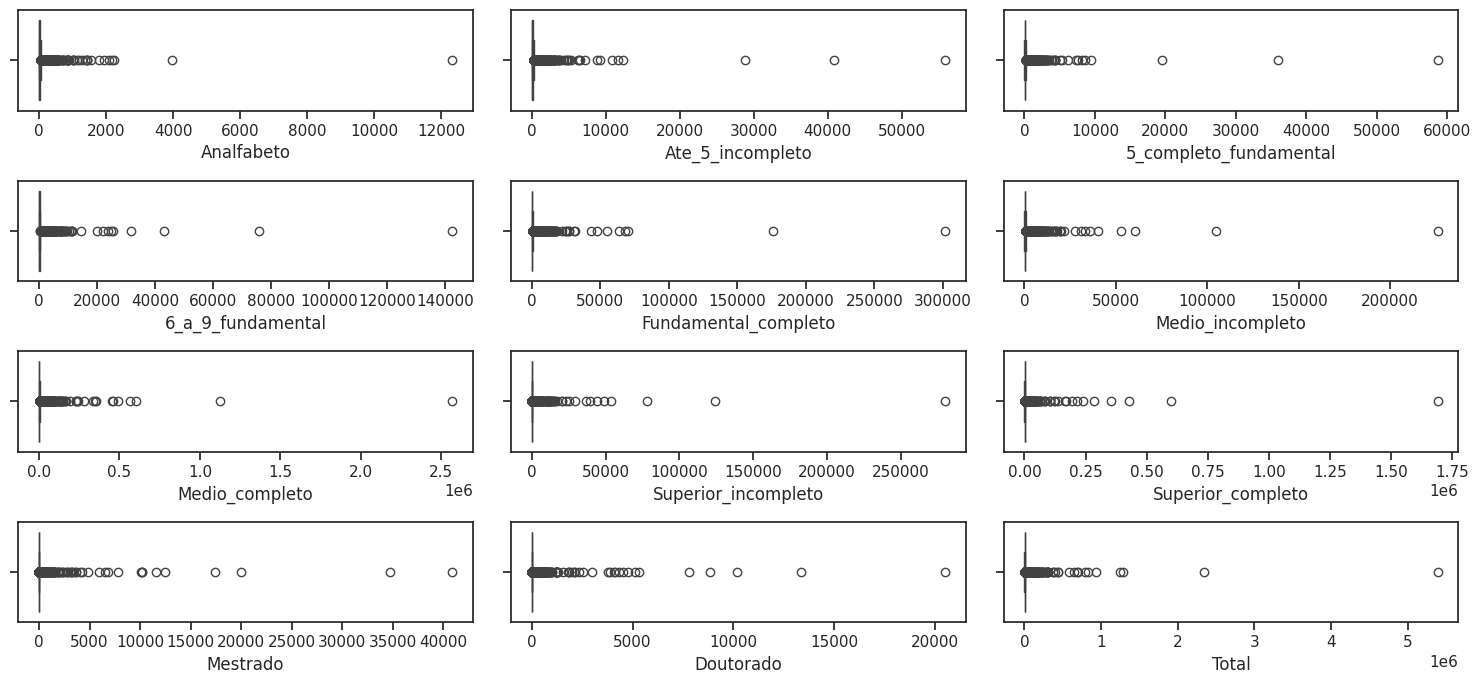

In [49]:
#@markdown Analyze outliers with a BoxPlot
numeric_features = list(df.keys())[2:]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.boxplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

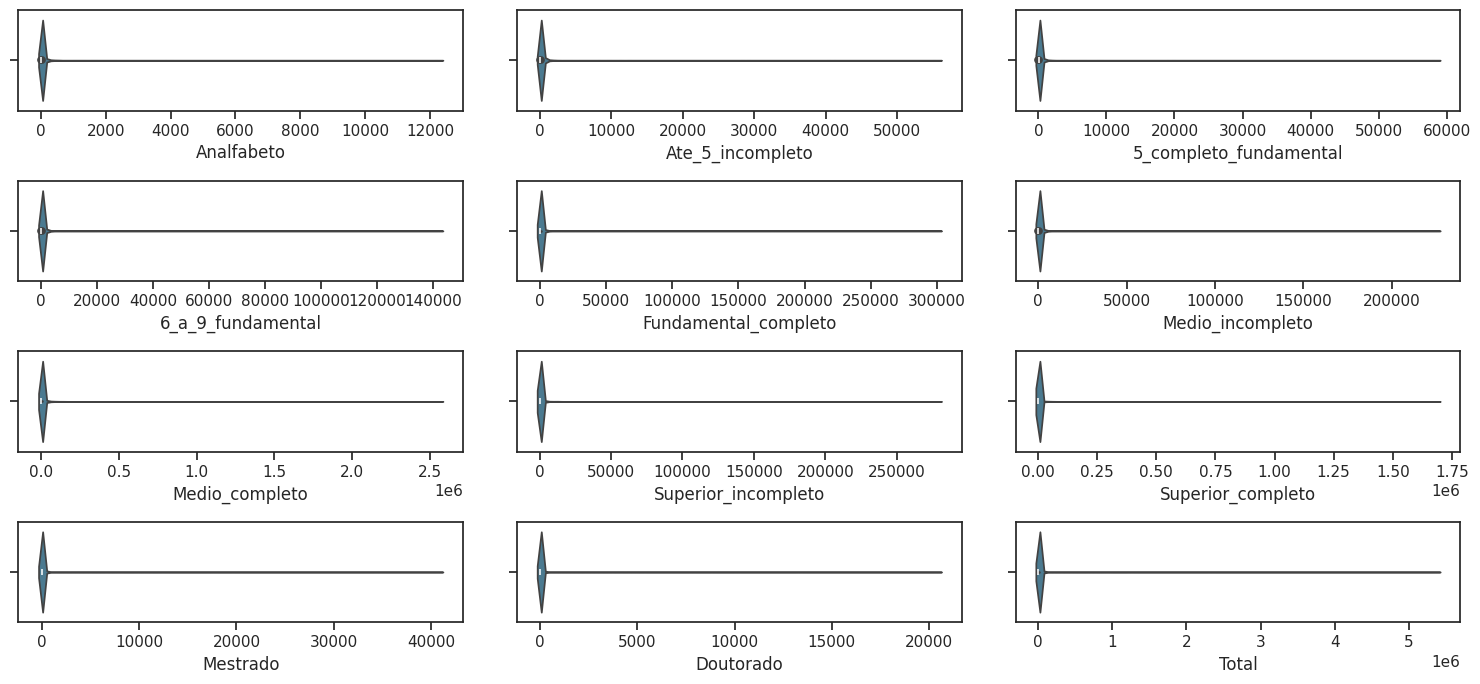

In [50]:
#@markdown Analize data distribution and outliers with a violin plot

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.violinplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

In [51]:
#@title ## Create new dataset without outliers
def remove_outliers_iqr(df: pd.DataFrame):
    # Compute Quantilies
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    # Define upper and lower limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply filter in dataset
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_filtered

df_without_outliers = remove_outliers_iqr(df.iloc[:,2:])

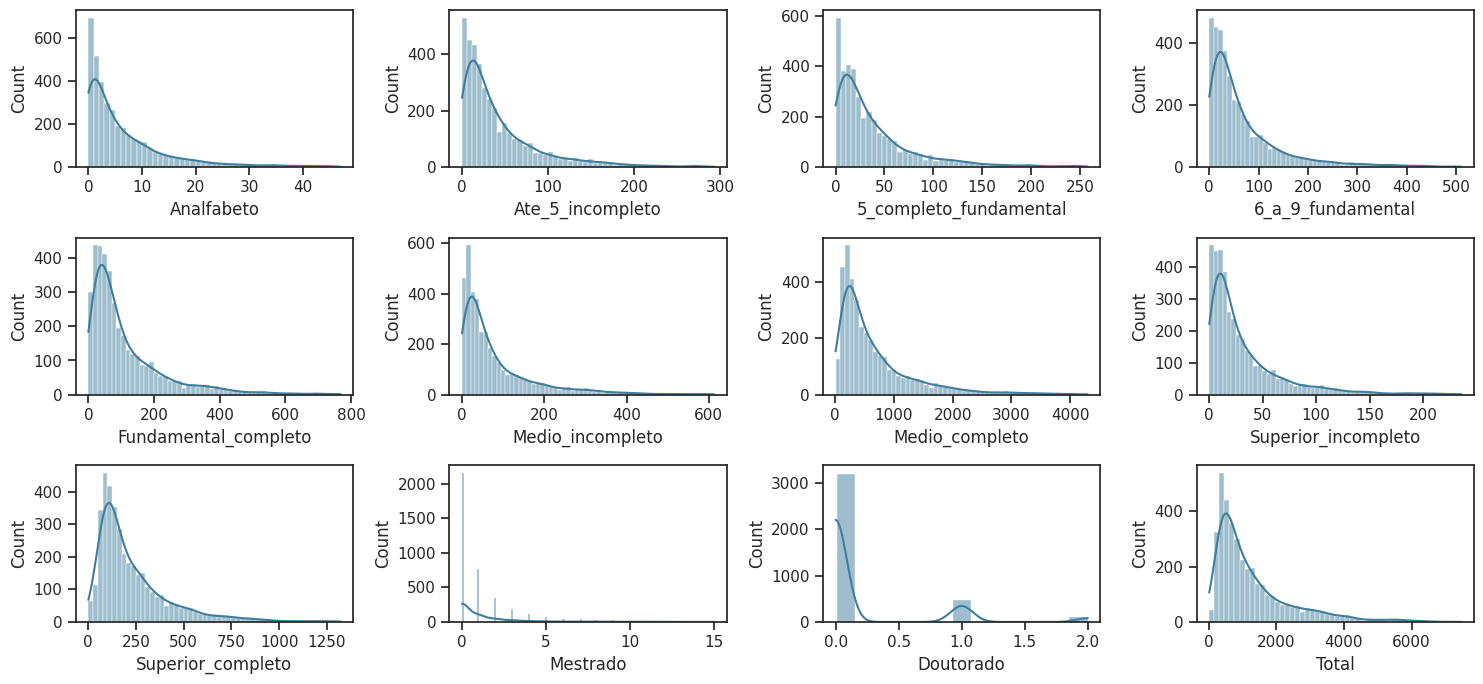

In [52]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_outliers, x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()

## **Creating Groups fom Quartiles**

Criar grupos a partir dos quantils da variavel total, que é a soma de todas as outras variaveis

In [53]:
target = 'Total' #@param
num_quantiles = 4 #@param

initial_percentage_of_the_quantilies = 1 / (num_quantiles)
percentage_of_the_quantilies = np.arange(0, 1, initial_percentage_of_the_quantilies)[1:]
print(f'Quantis Observados', percentage_of_the_quantilies)

VALUES_OF_THE_QUANTILES = df[target].quantile(q=percentage_of_the_quantilies).to_numpy()
print(f'Valores de limiar usados', VALUES_OF_THE_QUANTILES)

def define_quantile_group(x):

  for group_index, threshold in enumerate(VALUES_OF_THE_QUANTILES):

    if x < threshold:
      return group_index

  return group_index + 1

df['Group'] = df[target].apply(lambda x : define_quantile_group(x))

Quantis Observados [0.25 0.5  0.75]
Valores de limiar usados [ 603.   1334.   3769.75]


Atributos e Indice
{'5_completo_fundamental': 4,
 '6_a_9_fundamental': 5,
 'Analfabeto': 2,
 'Ate_5_incompleto': 3,
 'Doutorado': 12,
 'Estado': 0,
 'Fundamental_completo': 6,
 'Group': 14,
 'Medio_completo': 8,
 'Medio_incompleto': 7,
 'Mestrado': 11,
 'Municipio': 1,
 'Superior_completo': 10,
 'Superior_incompleto': 9,
 'Total': 13}


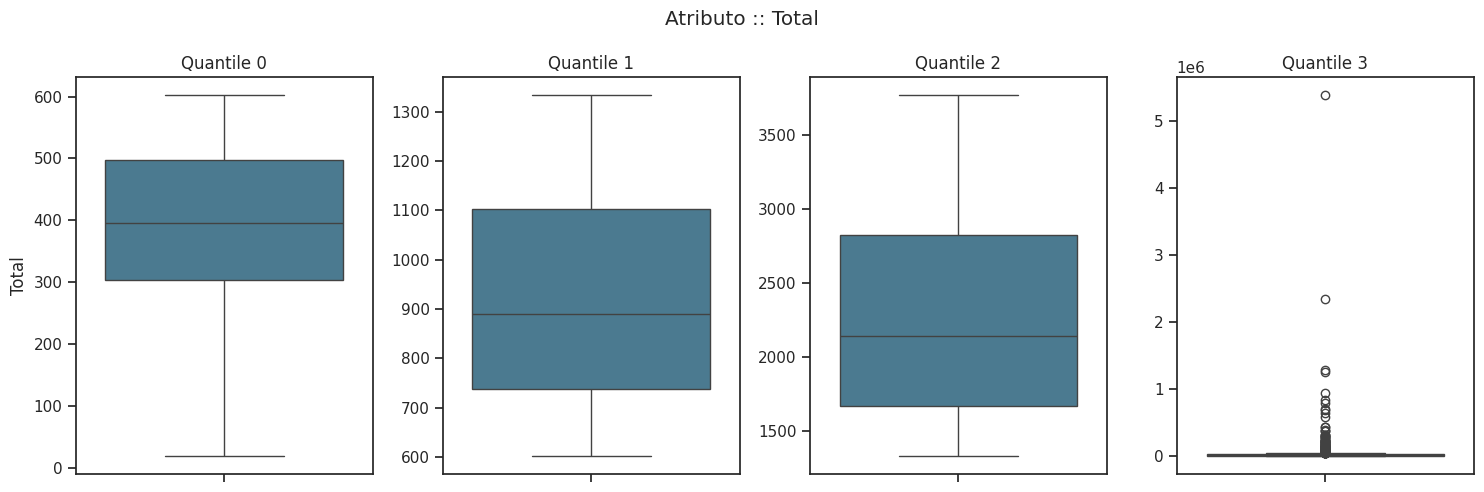

In [57]:
#@markdown Analyze outliers with a BoxPlot
from pprint import pprint

feature_index = 13 #@param

key = list(df.keys())[feature_index]
dict_feature_name_idx = {feature_name: idx for idx, feature_name in enumerate(df.keys())}

print(f'Atributos e Indice')
pprint(dict_feature_name_idx)

fig, axs = plt.subplots(ncols=num_quantiles, figsize=(15, 5))

for group_index in range(num_quantiles):
  sns.boxplot(df[df['Group'] == group_index], y=key, ax=axs[group_index])
  axs[group_index].set_title(f'Quantile {group_index}')

  if group_index > 0:
    axs[group_index].set_ylabel('')

treated_key = key.capitalize().replace('_', ' ')
plt.suptitle(f'Atributo :: {treated_key}')
plt.tight_layout()
plt.show()

## **Remove selected outliers $\to$ "Metropolis"**

In [58]:
df[['Municipio', 'Total']].sort_values(by=['Total'], ascending=False).head(20)

Municipio    Total
3829       Sao paulo  5390446
3242  Rio de janeiro  2339294
2309  Belo horizonte  1287288
5569        Brasilia  1250053
4005        Curitiba   935984
949        Fortaleza   828827
2162        Salvador   788195
1596          Recife   703180
4931    Porto alegre   684076
5417         Goiania   643009
111           Manaus   582757
169            Belem   433899
3375        Campinas   433812
635         Sao luis   394063
3479       Guarulhos   376358
3331         Barueri   367439
4398   Florianopolis   311473
5122    Campo grande   307059
1163           Natal   307027
1337     Joao pessoa   301635

In [59]:
#@title Remove cities with feature Total bigger 350.000
th = 350_000 #@param
df_without_bigger_cities = df[df['Total'] < th]
df_without_bigger_cities = df_without_bigger_cities.reset_index().drop(columns=['index'])

#@markdown Create Quantilies Groups
num_quantiles = 4 #@param
initial_percentage_of_the_quantilies = 1 / (num_quantiles + 1)
percentage_of_the_quantilies = np.arange(0, 1, initial_percentage_of_the_quantilies)[1:]
print(f'Quantis Observados', percentage_of_the_quantilies)

VALUES_OF_THE_QUANTILES = df_without_bigger_cities['Total'].quantile(q=percentage_of_the_quantilies).to_numpy()
print(f'Valores de limiar usados', VALUES_OF_THE_QUANTILES)

def define_quantile_group(x):

  for group_index, threshold in enumerate(VALUES_OF_THE_QUANTILES):
    if x < threshold:
      return group_index

  return group_index + 1

df_without_bigger_cities['Group'] = df_without_bigger_cities['Total'].apply(lambda x : define_quantile_group(x))

Quantis Observados [0.2 0.4 0.6 0.8]
Valores de limiar usados [ 515.   967.4 1912.8 5095. ]


Atributos e Indice
{'5_completo_fundamental': 4,
 '6_a_9_fundamental': 5,
 'Analfabeto': 2,
 'Ate_5_incompleto': 3,
 'Doutorado': 12,
 'Estado': 0,
 'Fundamental_completo': 6,
 'Group': 14,
 'Medio_completo': 8,
 'Medio_incompleto': 7,
 'Mestrado': 11,
 'Municipio': 1,
 'Superior_completo': 10,
 'Superior_incompleto': 9,
 'Total': 13}


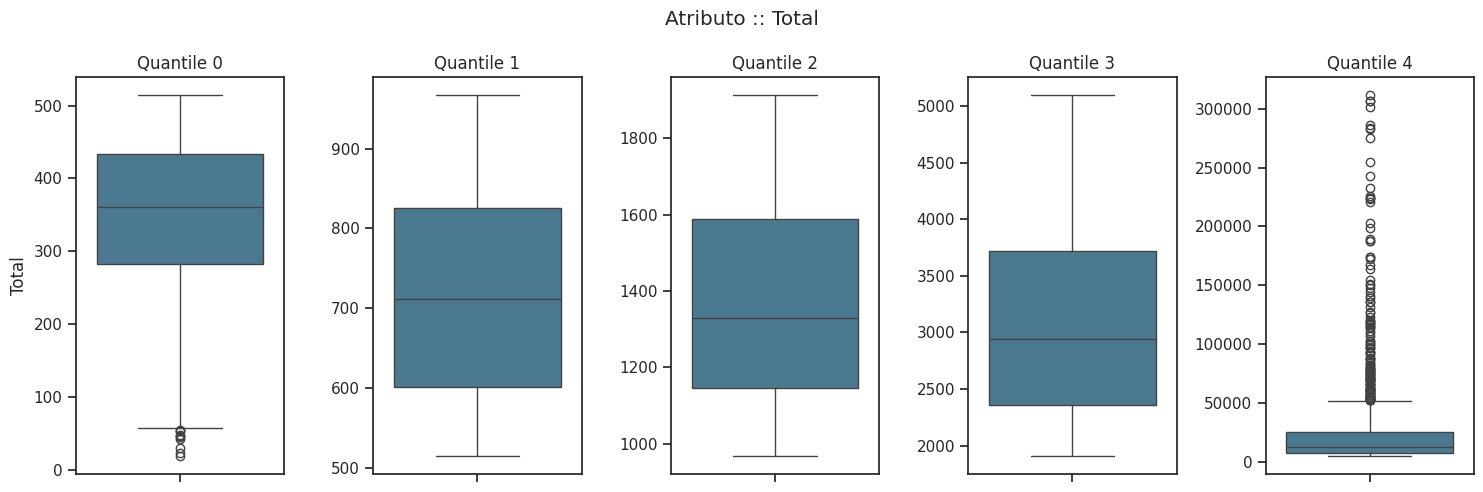

In [60]:
#@markdown Analyze outliers with a BoxPlot
from pprint import pprint

feature_index = 13 #@param

key = list(df_without_bigger_cities.keys())[feature_index]
dict_feature_name_idx = {feature_name: idx for idx, feature_name in enumerate(df_without_bigger_cities.keys())}

print(f'Atributos e Indice')
pprint(dict_feature_name_idx)

fig, axs = plt.subplots(ncols=num_quantiles + 1, figsize=(15, 5))

for group_index in range(num_quantiles + 1):
  sns.boxplot(df_without_bigger_cities[df_without_bigger_cities['Group'] == group_index], y=key, ax=axs[group_index])
  axs[group_index].set_title(f'Quantile {group_index}')

  if group_index > 0:
    axs[group_index].set_ylabel('')

treated_key = key.capitalize().replace('_', ' ')
plt.suptitle(f'Atributo :: {treated_key}')
plt.tight_layout()
plt.show()

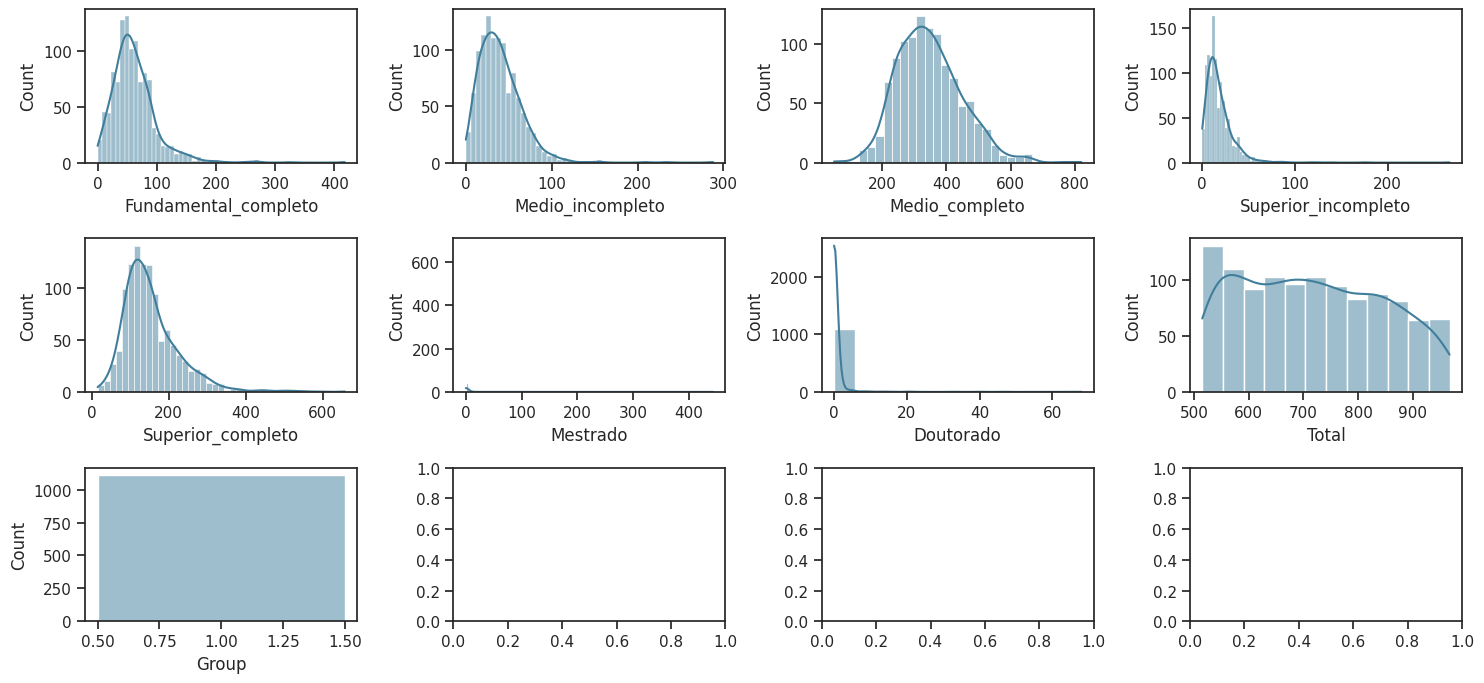

In [61]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

group = 1 #@param

numeric_features = list(df.keys())[6:]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_bigger_cities[df_without_bigger_cities['Group'] == group], x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()

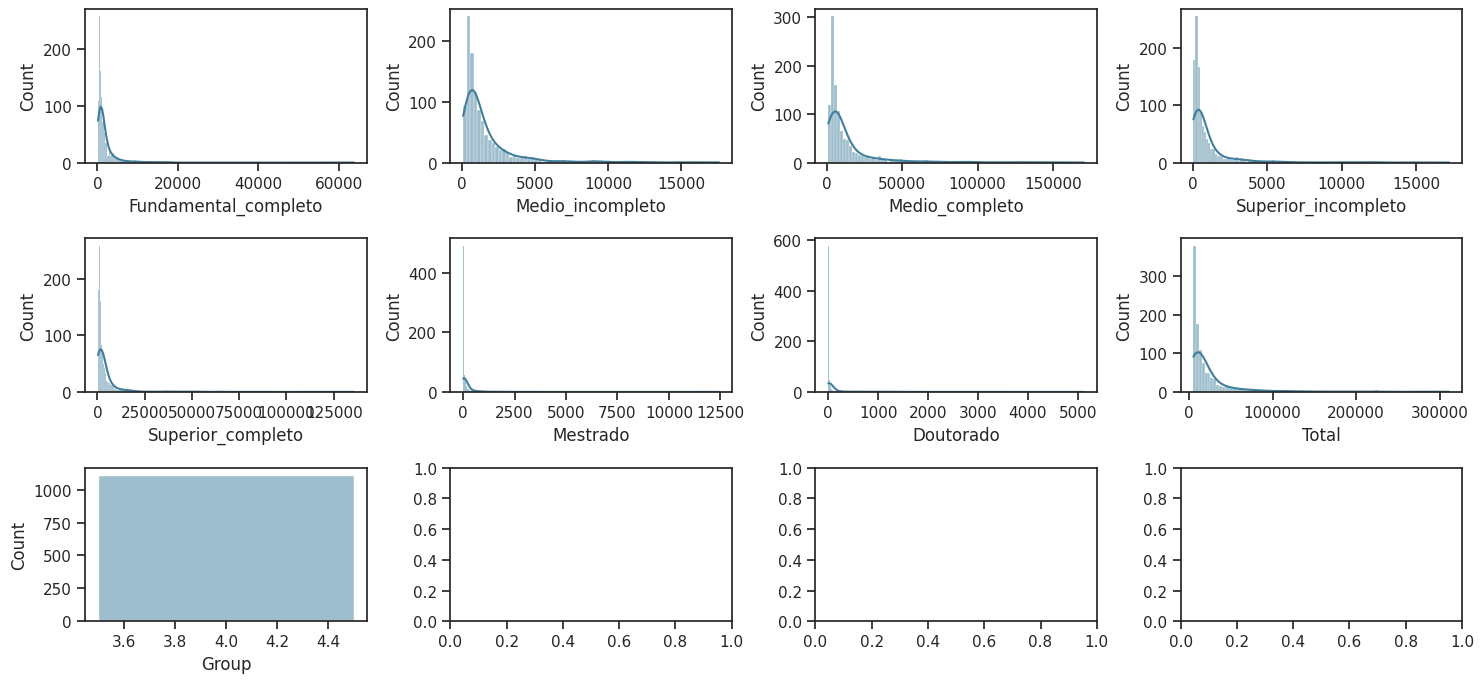

In [62]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

group = 4 #@param

numeric_features = list(df.keys())[6:]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_bigger_cities[df_without_bigger_cities['Group'] == group], x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()

## **Creating Clusters with Kmeans**

In [63]:
#@title Imports

# Cluster the data
from sklearn.cluster import KMeans

# Score to evaluate cluster
from sklearn.metrics import silhouette_score

# Pre-processing dataframe
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tqdm.notebook import trange, tqdm

In [64]:
#@title Processing Dataset
X = df.copy()
X = X.drop(columns=['Estado','Municipio','Group','Total'])

# Scaler dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## **K-means**

  0%|          | 0/19 [00:00<?, ?it/s]

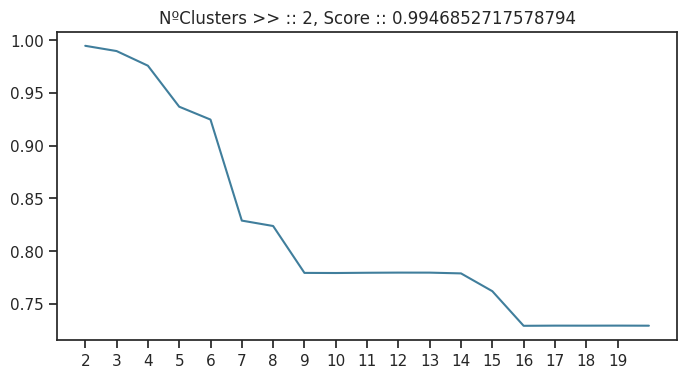


Contagem das distribuições das labels ::  [5568    2]


In [65]:
#@title Create Clusters
num_min_clusters = 2 #@param
num_max_clusters = 20 #@param

list_with_num_of_clusters = trange(num_min_clusters, num_max_clusters + 1)
silhuette_results = []

for num_clusters in list_with_num_of_clusters:
  # Instancead Kmeans object
  kmeans = KMeans(init='k-means++',
                  n_clusters=num_clusters,
                  random_state=0,
                  n_init="auto")

  kmeans_labels = kmeans.fit_predict(X)

  # Compute slhouete score
  score = silhouette_score(X, kmeans_labels)

  # Store sore
  silhuette_results.append(score)


n_clusters_chosen = range(num_min_clusters, num_max_clusters)[np.argmax(silhuette_results)]

# Plot scores
plt.figure(figsize=(8, 4))

sns.lineplot(x=list_with_num_of_clusters, y=silhuette_results)

plt.xticks(range(num_min_clusters, num_max_clusters))

plt.title(f'NºClusters >> :: {n_clusters_chosen}, Score :: {np.max(silhuette_results)}')

plt.show()


# Create Kmeans labels

kmeans = KMeans(init='k-means++',
                n_clusters=n_clusters_chosen,
                random_state=0,
                n_init="auto")

kmeans_labels = kmeans.fit_predict(X)

_, count_of_labels = np.unique(kmeans_labels, return_counts=True)

print(f'\nContagem das distribuições das labels :: ', count_of_labels)

# **EDA Dataset with Economic Level**

In [66]:
#@title Add Regions in DataFrame
regions = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'CentroOeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

inverted_regions = {estado: region for region, estados in regions.items() for estado in estados}

df_with_region = df.copy()

df_with_region['Regiao'] = df['Estado'].map(inverted_regions)

In [67]:
#@title ## Create new dataframe with Economic Level and Population
df_with_economic_level = pd.merge(df_with_region, nve_df, on=['Estado', 'Municipio'])
df_with_economic_level = df_with_economic_level.drop(columns=['Tag', 'Nome', 'Nivel_sociocultural',
                                                              'Nivel_capacidades_institucionais',
                                                              'Nivel_meio_ambiente', 'Pib_per_capita_do_municipio', 'Pib_serviços',
                                                              'Pib_industria', 'Pib_adminstração_publica', 'Pib_agropecuária',
                                                              'População_ocupada_com_vinculo_formal'])

# Rename Dataframe columns
df_with_economic_level.columns = [key.replace(' ','_').capitalize() for key in df_with_economic_level.columns]

df_with_economic_level = df_with_economic_level.rename(columns={'Nivel_economica':'Nivel_economico'})

In [68]:
# Sort Dataframe columns
filter = ['Estado', 'Regiao', 'Codigo', 'Municipio', 'Latitude', 'Longitude',
          'Analfabeto', 'Ate_5_incompleto',
          '5_completo_fundamental', '6_a_9_fundamental', 'Fundamental_completo',
          'Medio_incompleto', 'Medio_completo', 'Superior_incompleto',
          'Superior_completo', 'Mestrado', 'Doutorado', 'Total',
          'Populacao_estimada','Nivel_economico']

# Define new frame
df = df_with_economic_level[filter]

# Show head
df[filter].head()

Estado Regiao   Codigo          Municipio  Latitude  Longitude  Analfabeto  \
0     RO  Norte  1100023          Ariquemes  -9.90571   -63.0325          83   
1     RO  Norte  1100031             Cabixi -13.49450   -60.5520           3   
2     RO  Norte  1100049             Cacoal -11.43430   -61.4562          50   
3     RO  Norte  1100056         Cerejeiras -13.18700   -60.8168           6   
4     RO  Norte  1100064  Colorado do oeste -13.11740   -60.5454           8   

   Ate_5_incompleto  5_completo_fundamental  6_a_9_fundamental  \
0               441                     347                767   
1                 9                      45                 46   
2               501                     282                681   
3                73                     100                153   
4                77                      50                165   

   Fundamental_completo  Medio_incompleto  Medio_completo  \
0                   795              1587           13397   
1                    56                48             503   
2                  1091              1367           11631   
3                   170               218            1627   
4                   200               152            1587   

   Superior_incompleto  Superior_completo  Mestrado  Doutorado  Total  \
0                  798               3024        91         16  21346   
1                   18                159         0          1    888   
2                 1088               3064       127         23  19905   
3                  106                455        27          0   2935   
4                   90                403         0          0   2732   

   Populacao_estimada  Nivel_economico  
0             96833.0                4  
1              5351.0                3  
2             86887.0                4  
3             15890.0                4  
4             15663.0                4

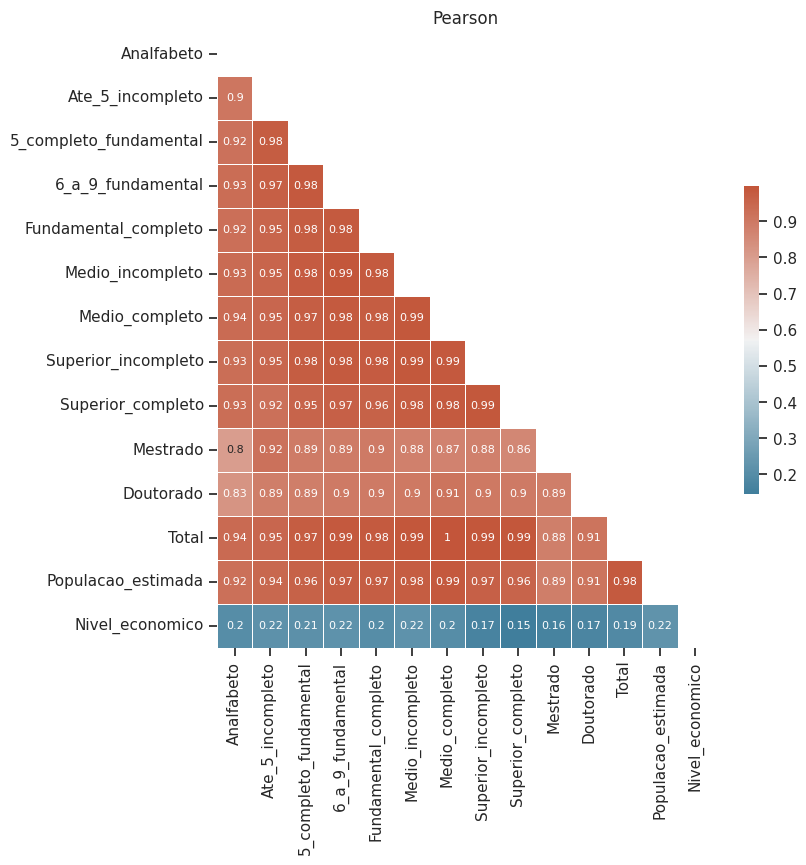

In [69]:
#@markdown Pearson Correlation

plt.figure(figsize=(8, 8))

corr_method = 'pearson'

corr = df.iloc[:, 6:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 8})

plt.title(corr_method.capitalize())

plt.show()

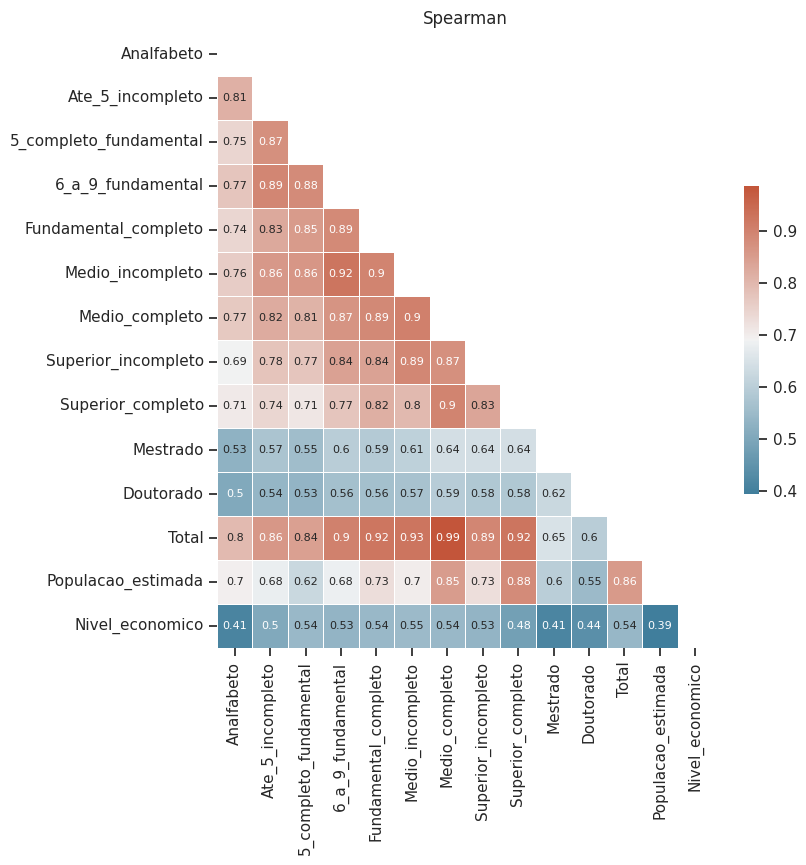

In [70]:
#@markdown Spearman Correlation

plt.figure(figsize=(8, 8))

corr_method = 'spearman'

corr = df.iloc[:, 6:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 8})

plt.title(corr_method.capitalize())

plt.show()

### **PairPlot Visual Analyse**

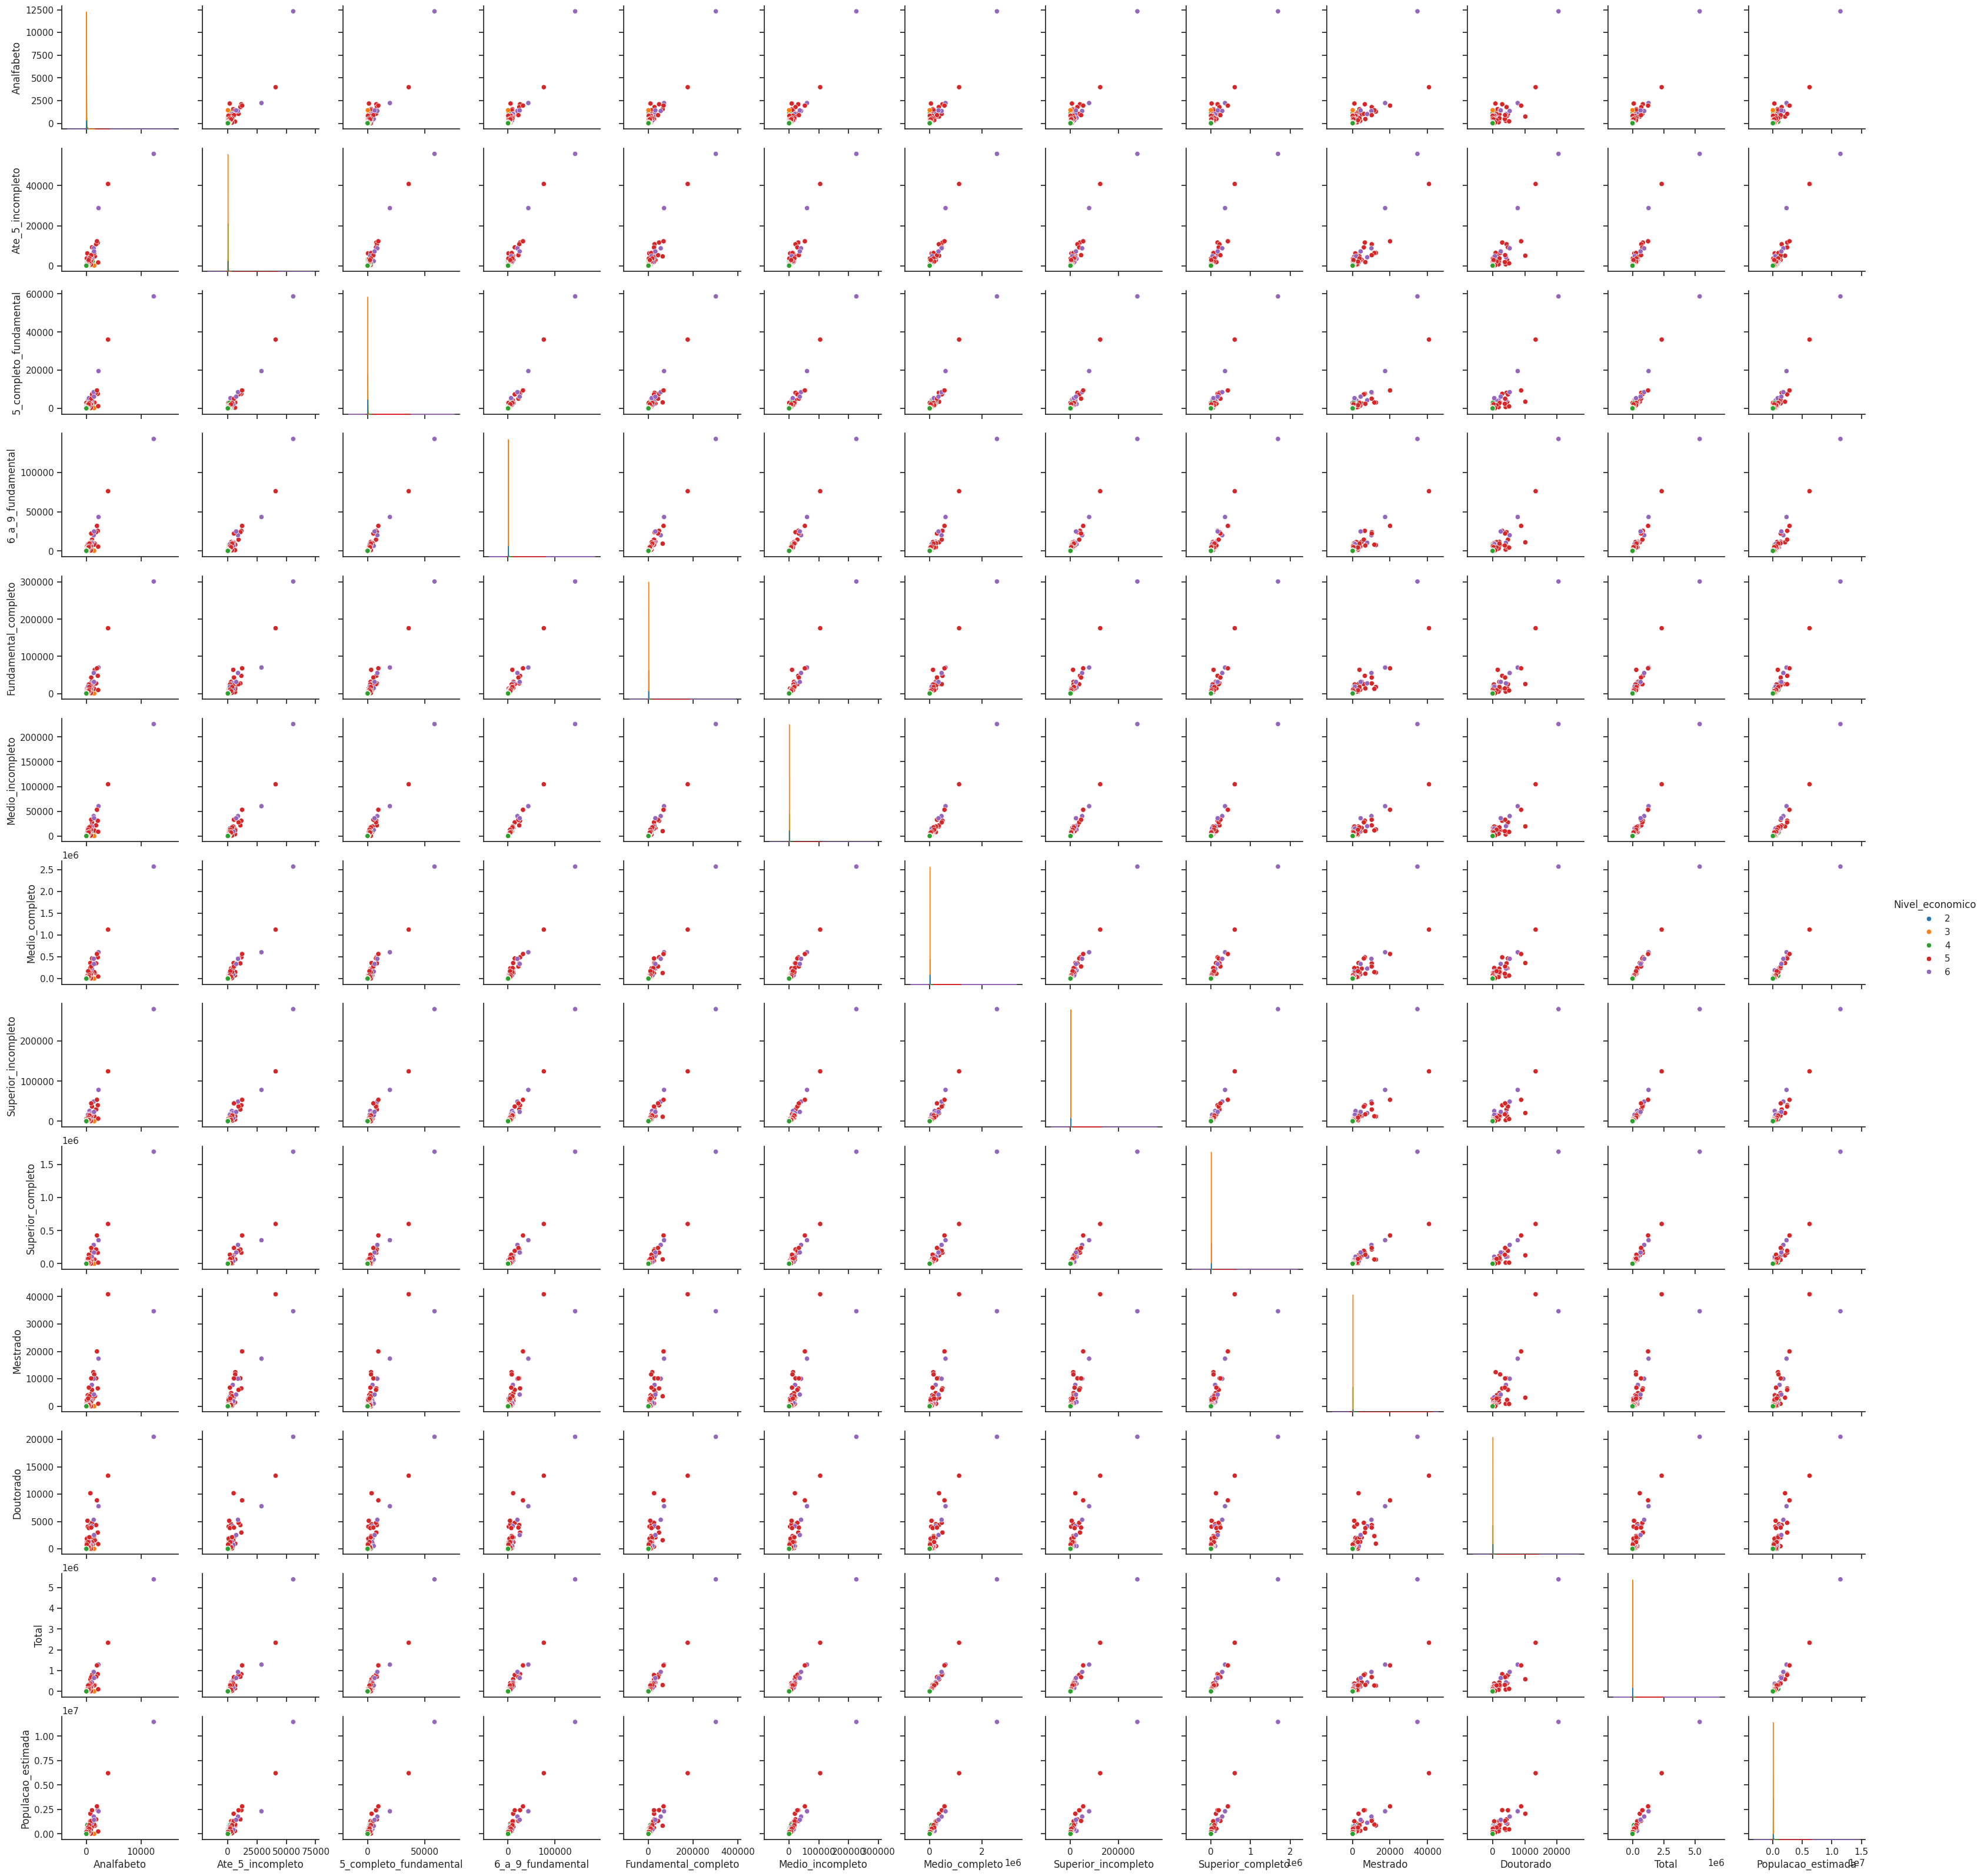

In [71]:
sns.pairplot(df.iloc[:, 6:],
             hue="Nivel_economico",
             palette='tab10')

plt.show()

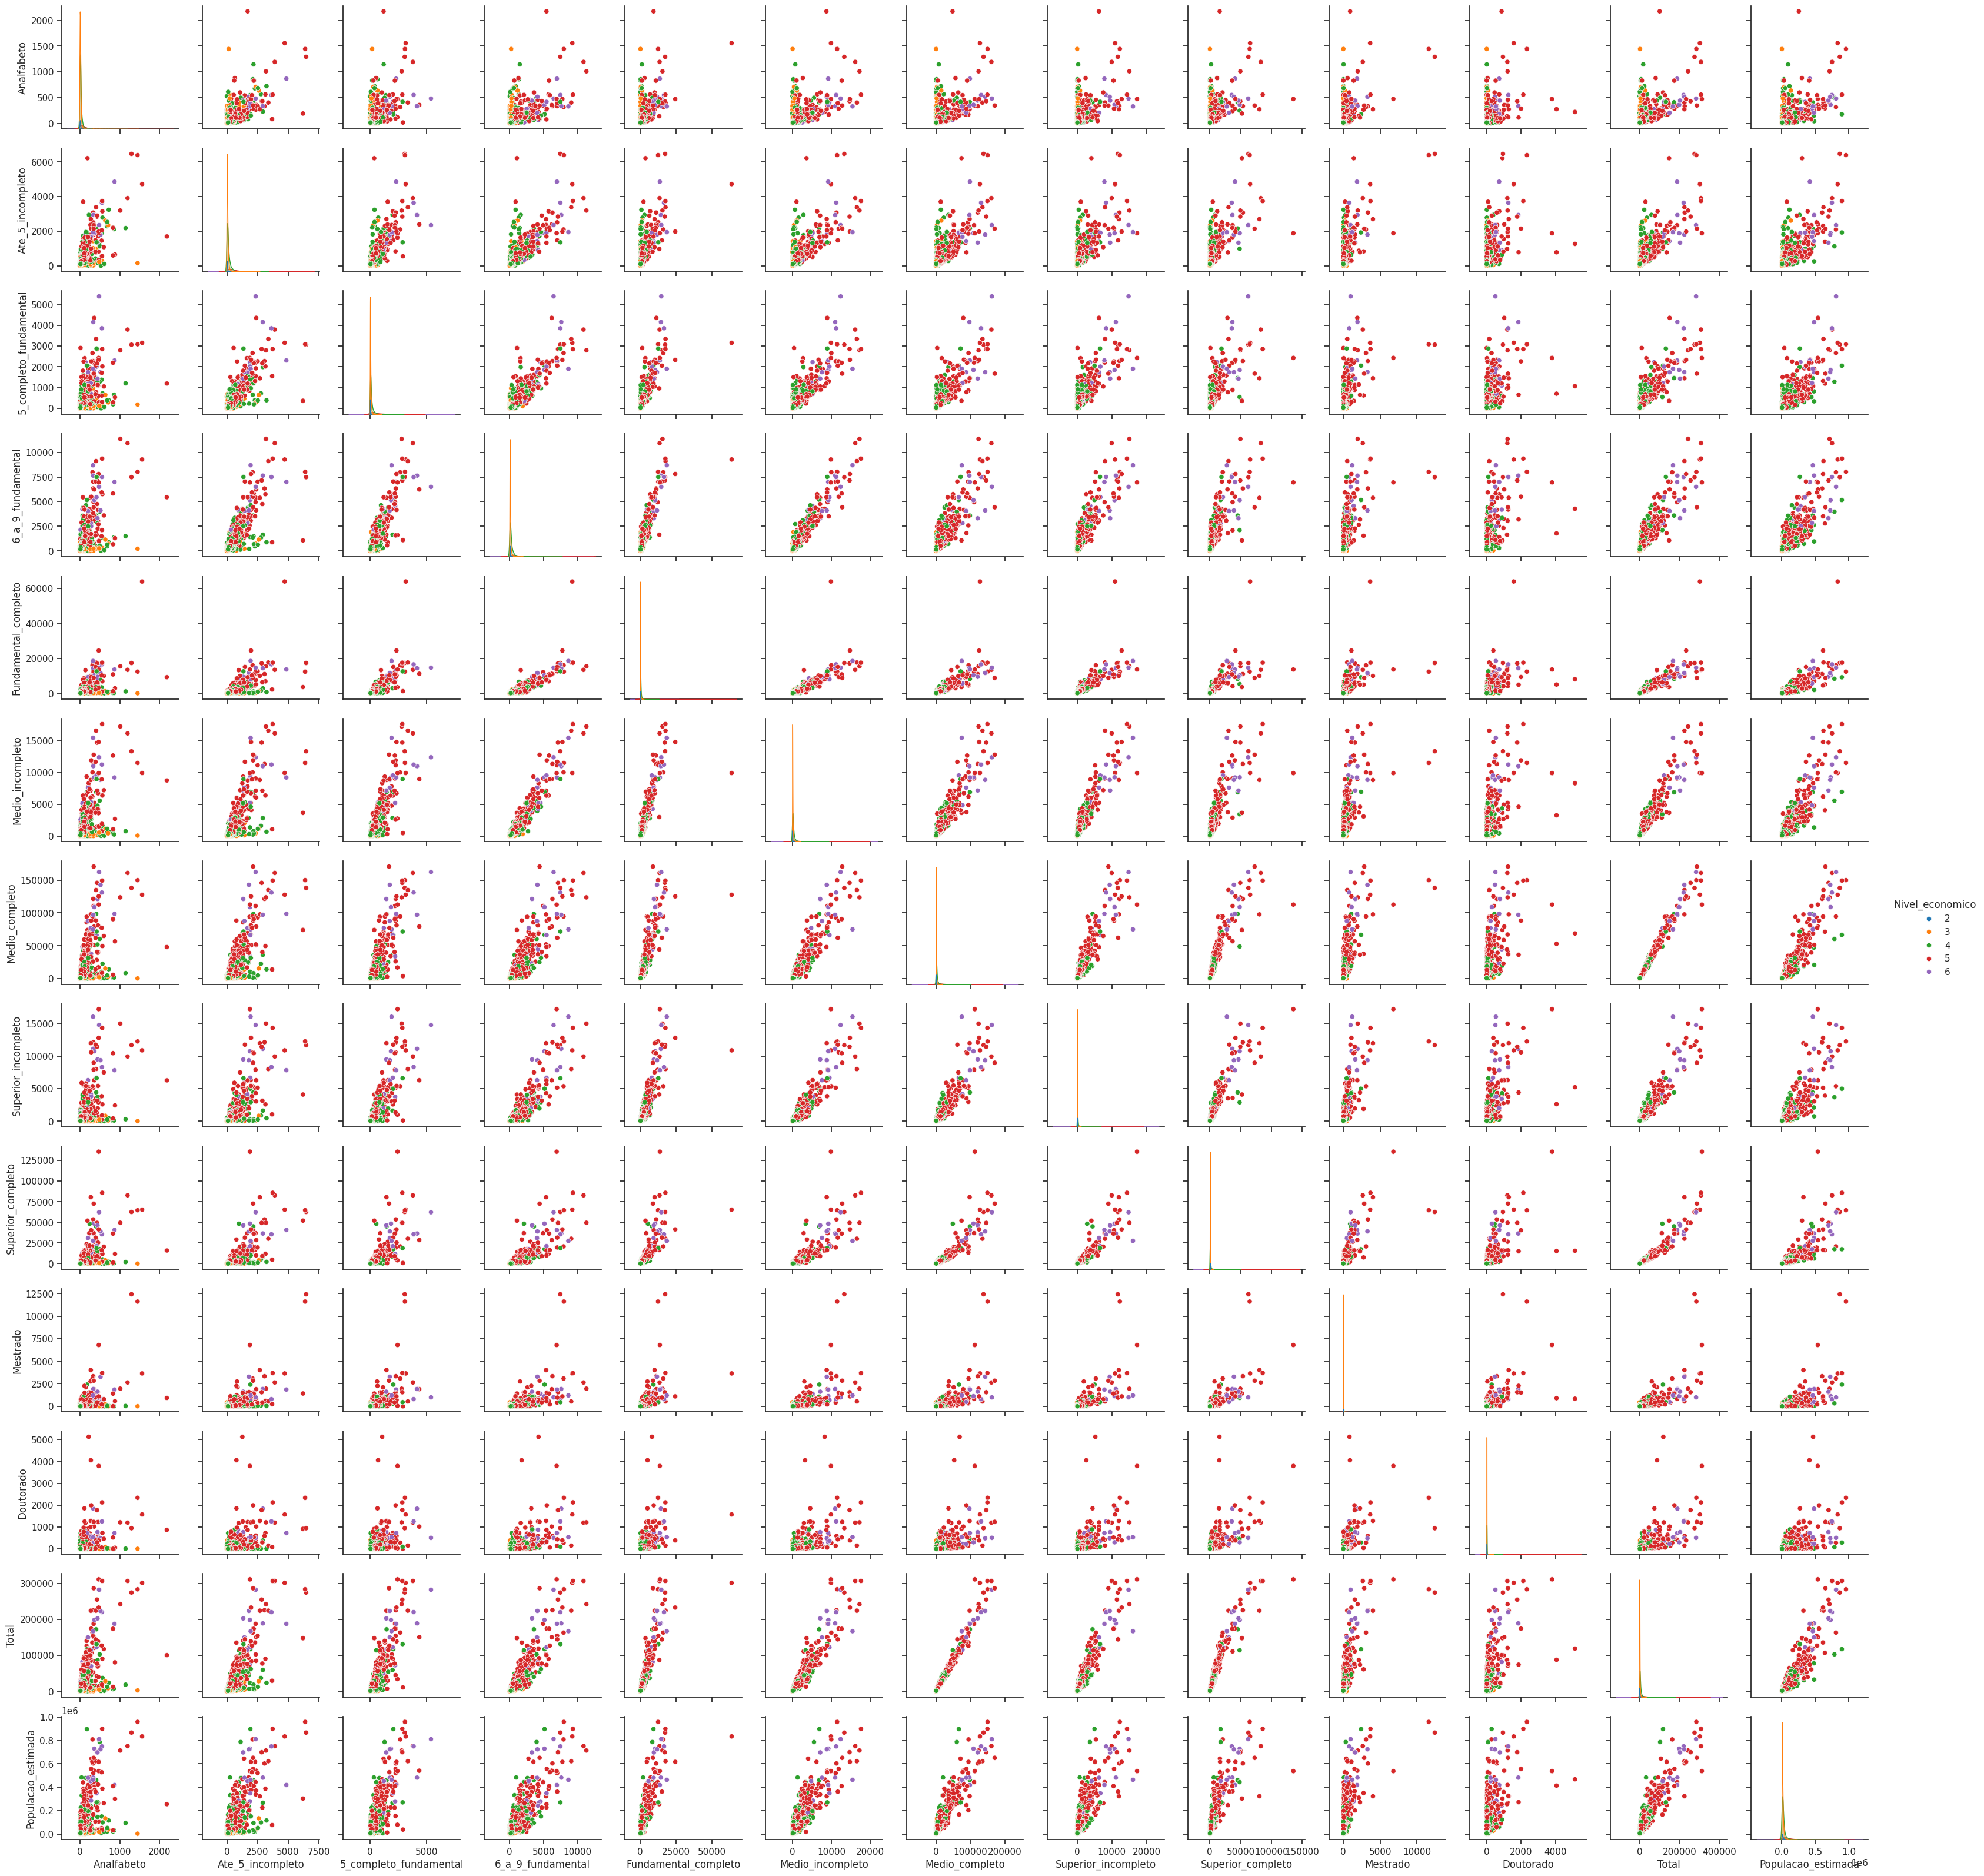

In [72]:
th = 350_000
df_without_bigger_cities = df[df['Total'] < th]
df_without_bigger_cities = df_without_bigger_cities.reset_index().drop(columns=['index'])


sns.pairplot(df_without_bigger_cities.iloc[:, 6:],
             hue="Nivel_economico",
             palette='tab10')

plt.show()

## **Region Analyze**

In [73]:
#@title Analise do número de cidades com determinado nivel economico
fig = go.Figure()

nivel_num_cities_cities = df.groupby('Nivel_economico').agg('size').reset_index().rename(columns={0:'Num_Cidades'})

fig.add_trace(
    go.Bar(
        y=nivel_num_cities_cities['Nivel_economico'],
        x=nivel_num_cities_cities['Num_Cidades'],
        text=nivel_num_cities_cities['Num_Cidades'],
        textposition='outside',
        marker_color=px.colors.sequential.Magma[::-1],
        orientation='h'
    )
)

fig.update_layout(
    title='Numero de Cidades por Nivel Economico',
    yaxis_title='Nivel Economico',
    xaxis_title='Numero de Cidades',
    template='plotly_white'
)

fig.show()

In [74]:
#@title Analise do Número de Cidades por Regiao
reg_by_city = df.groupby('Regiao').agg('size').reset_index().rename(columns={0:'Num_cidades'})
reg_by_city = reg_by_city.sort_values('Num_cidades')

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=reg_by_city['Num_cidades'],
        y=reg_by_city['Regiao'],
        orientation='h',
        marker_color=px.colors.sequential.Magma[::-1],
        text=reg_by_city['Num_cidades'],
        textposition='outside'
    )
)

fig.update_layout(
    title="Número de Cidades por Região",
    xaxis_title="Número de Cidades",
    yaxis_title="Região",
    template='plotly_white',
    width=1000,
    height=600,
)

fig.show()

In [75]:
#@title Numero de Cidades por Nivel Economico em cada Região
reg_nv_economic_num_cities = df.groupby(['Regiao', 'Nivel_economico']).agg('size').reset_index().rename(columns={0:'Num_cidades'})

fig = go.Figure()

economic_nivel = reg_nv_economic_num_cities['Nivel_economico'].unique()

for nivel in economic_nivel:
  aux_frame = reg_nv_economic_num_cities
  aux_frame = aux_frame[aux_frame['Nivel_economico'] == nivel]

  fig.add_trace(
      go.Bar(
          name=f'Nivel Economico {nivel}',
          x=aux_frame['Regiao'],
          y=aux_frame['Num_cidades'],
          text=aux_frame['Num_cidades'],
          textposition='outside'
      )
  )


fig.update_layout(
    title='Numero de Cidades por Região e Nivel Economico',
    xaxis_title='Região',
    yaxis_title='Numero de Cidades',
    barmode='group',
    template='plotly_white',
    width=1200,
    height=500
)

fig.show()

In [76]:
#@title Box Plot do Nivel Economico em cada Regiao
fig = go.Figure()

regions = df['Regiao'].unique()

for region in regions:
  aux_frame = df[df['Regiao'] == region]

  fig.add_trace(
      go.Box(
          name=region,
          y=aux_frame['Nivel_economico'],
          boxpoints='all'
      )
  )

fig.show()

In [77]:
#@title Evaluate feature performance - All Regions
X = df.iloc[:, 6:].drop(columns=['Nivel_economico'])
Y = df['Nivel_economico']

clf = RandomForestClassifier(random_state=0)
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(clf, X, Y, cv=skf)

print(f'Accuracy :: {scores.mean():.4} ± {scores.std():.4}')

Accuracy :: 0.582 ± 0.02178


In [99]:
#@title Evaluate feature performance in each Region
region_and_scores = {}
num_samples_by_region = []
for region in tqdm(df['Regiao'].unique()):

  aux_frame = df[df['Regiao'] == region]
  X = aux_frame.iloc[:, 6:].drop(columns=['Nivel_economico'])
  Y = aux_frame['Nivel_economico']

  clf = RandomForestClassifier(random_state=0)
  skf = StratifiedKFold(n_splits=5)

  scores = cross_val_score(clf, X, Y, cv=skf)

  region_and_scores[region] = scores

  num_samples_by_region.append(len(Y))


for region in region_and_scores:
  scores = region_and_scores[region]
  print(f'{region} :: {scores.mean():.4} ± {scores.std():.4}')

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Norte :: 0.7103 ± 0.02455
Nordeste :: 0.6433 ± 0.0166
Sudeste :: 0.6242 ± 0.03578
Sul :: 0.6 ± 0.0558
CentroOeste :: 0.5992 ± 0.03373


In [100]:
#@title Relação Número de Amostras por Região e poder preditivo
colors = ['blue', 'red', 'orange', 'green', 'black']

fig = go.Figure()

for i, region in enumerate(region_and_scores):
  score = region_and_scores[region].mean()

  fig.add_trace(
      go.Scatter(
          x=[score],
          y=[num_samples_by_region[i]],
          mode='markers',
          marker_color=colors[i],
          name=region
      )
  )

fig.update_layout(
  title='Número de Cidades de cada Região por Auracia Media',
  yaxis_title='Número de Cidades',
  xaxis_title='Acuracia',
  width=800,
  height=500,
  template='plotly_white'
)
fig.show()

In [101]:
!gdown 10uof0LSwNMTcl5w_XZI6B2WyyOFunhcm

df_regions = pd.read_excel('/content/regioes_geograficas.xlsx')

df_with_rgint = pd.merge(df, df_regions.rename(columns={'CD_GEOCODI':'Codigo'}), how='left', on='Codigo')
df_with_rgint = df_with_rgint[['cod_rgint', 'nome_rgint', 'Estado', 'Regiao', 'Codigo', 'Municipio', 'Latitude', 'Longitude',
                                'Analfabeto', 'Ate_5_incompleto', '5_completo_fundamental',
                                '6_a_9_fundamental', 'Fundamental_completo', 'Medio_incompleto',
                                'Medio_completo', 'Superior_incompleto', 'Superior_completo',
                                'Mestrado', 'Doutorado', 'Total', 'Populacao_estimada',
                                'Nivel_economico']]


Downloading...
From: https://drive.google.com/uc?id=10uof0LSwNMTcl5w_XZI6B2WyyOFunhcm
To: /content/regioes_geograficas.xlsx
100% 260k/260k [00:00<00:00, 79.5MB/s]


In [102]:
#@title Distribuição do Numero de Cidades por Região Imediata
rgint_and_cities = df_with_rgint.groupby('nome_rgint').agg('size').reset_index().rename(columns={0:'Num_cidades'})

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=rgint_and_cities['Num_cidades'],
        nbinsx=40
  )
)

fig.update_layout(
    title='Numero Cidades em cada Região Intermediaria',
    xaxis_title='Num. Cidades',
    yaxis_title='Contagem',
    template='plotly_white'
)

fig.show()

In [103]:
df_agg = df_with_rgint.groupby('nome_rgint').agg(
    mean_nivel_economico=('Nivel_economico', 'mean'),
    median_nivel_economico=('Nivel_economico', 'median'),
    std_nivel_economico=('Nivel_economico', 'std')
).reset_index()

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        name='Media de cada Rgint',
        x=df_agg['mean_nivel_economico']
    )
)

fig.add_trace(
    go.Histogram(
        name='Mediana de cada Rgint',
        x=df_agg['median_nivel_economico']
    )
)

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

# Região Intermediaria

In [ ]:
#@title Trainamento dos Modelos
rgint_and_scores = {}
n_samples = []
for rgint in tqdm(df_with_rgint['nome_rgint'].unique()):

  aux_frame = df_with_rgint[df_with_rgint['nome_rgint'] == rgint]
  X = aux_frame.iloc[:, 8:].drop(columns=['Nivel_economico'])
  Y = aux_frame['Nivel_economico']

  if len(Y) > 20:
    clf = RandomForestClassifier(random_state=0)
    skf = StratifiedKFold(n_splits=5)

    scores = cross_val_score(clf, X, Y, cv=5)

    rgint_and_scores[rgint] = scores
    n_samples.append(len(Y))

means_scores = [rgint_and_scores[key].mean() for key in rgint_and_scores]

In [134]:
#@title Numero de amostras influência na acuracia
fig = go.Figure()

rgint_and_region = dict(zip(df_with_rgint['nome_rgint'], df_with_rgint['Regiao']))

colors = {'Norte':'blue',
          'Nordeste':'red',
          'Sudeste':'orange',
          'Sul':'green',
          'CentroOeste':'black'}


legend_shown = set()

for idx, rgint_name in enumerate(rgint_and_scores):
  region = rgint_and_region[rgint_name]
  score = rgint_and_scores[rgint_name].mean()
  color = colors[region]

  show_legend = region not in legend_shown
  if show_legend:
      legend_shown.add(region)

  fig.add_trace(
      go.Scatter(
          x=[score],
          y=[n_samples[idx]],
          mode='markers',
          name=region if show_legend else '',
          marker_color=color,
          showlegend=show_legend
      )
  )

fig.update_layout(
  title='Número de Cidades por Auracia Media',
  yaxis_title='Número de Cidades',
  xaxis_title='Acuracia'
)

fig.show()